### Data Science
### Módulo 2 _ Machine Learning
### Aprendizaje no supervisado

# K-Means - clustering
### `Skillsforindustry.org`


In [2]:
# Tratamiento de datos
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs

# Gráficos
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

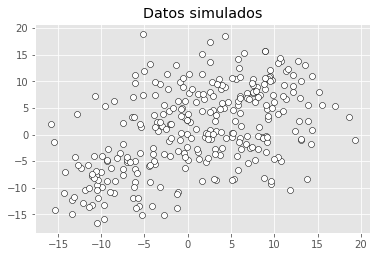

In [37]:
# Simulación de datos
X, y = make_blobs(
        n_samples    = 300, 
        n_features   = 7, 
        centers      = 4, 
        cluster_std  = 4.60, 
        shuffle      = False, 
        random_state = 0
       )

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.scatter(
    x = X[:, 0],
    y = X[:, 1], 
    c = 'white',
    marker    = 'o',
    edgecolor = 'black', 
)
ax.set_title('Datos simulados');

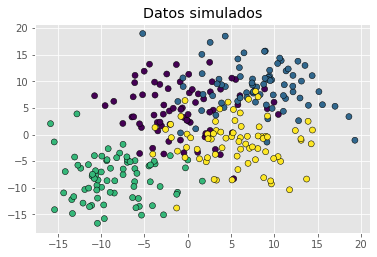

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.scatter(
    x = X[:, 0],
    y = X[:, 1], 
    c = y,
    marker    = 'o',
    edgecolor = 'black', 
)
ax.set_title('Datos simulados');

## Modelo Kmeans

Con la clase `sklearn.cluster.KMeans` de Scikit-Learn se pueden entrenar modelos de clustering utilizando el algoritmo k-means. Entre sus parámetros destacan:

* `n_clusters`: determina el número  K  de clusters que se van a generar.

* `init`: estrategia para asignar los centroides iniciales. Por defecto se emplea 'k-means++', una estrategia que trata de alejar los centroides lo máximo posible facilitando la convergencia. Sin embargo, esta estrategia puede ralentizar el proceso cuando hay muchos datos, si esto ocurre, es mejor utilizar 'random'.

* `n_init`: determina el número de veces que se va a repetir el proceso, cada vez con una asignación aleatoria inicial distinta. Es recomendable que este último valor sea alto, entre 10-25, para no obtener resultados subóptimos debido a una iniciación poco afortunada del proceso.

* `max_iter`: número máximo de iteraciones permitidas.

* `random_state`: semilla para garantizar la reproducibilidad de los resultados.

In [42]:
# Escalado de datos
X_scaled = scale(X)
X_scaled[:,1]

array([ 8.12037635e-01,  1.33135909e+00,  5.18299742e-01, -5.81952113e-01,
        3.00278184e-01,  4.65235998e-01, -5.93773473e-01,  8.56619036e-01,
        8.40168363e-02,  1.30505692e+00,  1.14804426e+00,  5.00911336e-01,
        1.57404405e+00, -8.27830907e-02,  9.70693003e-01,  1.68898340e-01,
        4.44746535e-01, -4.54943857e-01,  1.08576733e+00,  3.67788128e-01,
        1.56572158e+00,  1.12771511e+00,  8.28563054e-01,  4.57578483e-02,
        1.33740515e+00,  8.81841982e-01,  8.13009419e-01,  9.63588186e-01,
        6.49909661e-01, -4.84206866e-01,  1.34539403e-01,  6.77735831e-01,
       -5.64073715e-01,  5.09796118e-01,  7.86496167e-01,  7.35407369e-01,
        6.56372872e-01,  3.60647650e-01,  1.14136947e+00,  3.45638491e-01,
        1.40540439e+00,  8.35756991e-01,  4.81677799e-01,  5.88101390e-01,
        9.83129663e-01, -6.11262951e-01, -2.91213115e-01, -2.54367528e-02,
        1.43604236e-01,  4.16680731e-01, -1.60695388e-01,  3.03725874e-01,
       -5.52679850e-01,  

In [43]:
X[:, 1]

array([  7.31043287,  11.35457171,   5.02299259,  -3.54505555,
         3.32518204,   4.60976655,  -3.63711264,   7.65760391,
         1.64107887,  11.14974742,   9.92703465,   4.88758295,
        13.24444478,   0.34214918,   8.54593802,   2.30208099,
         4.4502079 ,  -2.5559976 ,   9.44206225,   3.85090572,
        13.17963478,   9.76872437,   7.43912211,   1.34314267,
        11.40165447,   7.85402386,   7.31800049,   8.4906103 ,
         6.04788531,  -2.78387894,   2.03451586,   6.26457749,
        -3.40583018,   4.95677188,   7.11153247,   6.71368604,
         6.09821661,   3.7953003 ,   9.87505566,   3.6784187 ,
        11.93118845,   7.49514383,   4.73780464,   5.56656257,
         8.64278666,  -3.77330936,  -1.28096873,   0.78872528,
         2.10510691,   4.23164961,  -0.26458128,   3.35203042,
        -3.31710214,   2.67800128,   8.22552625,   8.05057851,
         3.22984068,   8.57951084,  -8.29872764,  -0.1632937 ,
        -1.02954705,   0.70369321,  13.60058771,   2.28

In [44]:
X_scaled

array([[-1.5389882 ,  0.81203764,  0.9167385 , ...,  1.37295369,
        -0.64532826, -1.19374051],
       [-0.13403353,  1.33135909,  1.28651996, ..., -0.26176474,
        -0.27982649, -2.64043949],
       [-0.22948344,  0.51829974,  1.14038068, ..., -0.92330245,
         0.09786968, -1.97493782],
       ...,
       [ 1.53972005, -0.22589742,  1.08949664, ..., -0.46698523,
        -0.14147473,  1.56566587],
       [ 1.0402771 , -0.1823611 ,  0.57843061, ...,  1.70253445,
        -0.20419431,  0.30202146],
       [-0.31473876, -1.89852445,  0.1984955 , ...,  1.4345042 ,
        -1.53702073,  0.70784071]])

In [45]:
X.mean(axis =0)

array([ 1.15344125,  0.98681022, -0.86687838,  1.58409204,  1.60597203,
        0.82941448,  6.65438757])

In [46]:
### Replica la operación que hace scaler

In [48]:
# Modelo
modelo_kmeans = KMeans(n_clusters=4, n_init=25, random_state=123)
modelo_kmeans.fit(X=X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=25, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

El objeto devuelto por `KMeans()` contiene entre otros datos: la media de cada una de las variables para cada cluster `(cluster_centers_)`, es decir, los centroides. Un vector indicando a qué cluster se ha asignado cada observación `(.labels_)` y la suma total de cuadrados internos de todos los clusters `(.inertia_)`.

## Número de clusters



Al tratarse de una simulación, se conoce el verdadero número de grupos (4) y a cuál de ellos pertenece cada observación. Esto no sucede en la mayoría de casos prácticos, pero es útil como ejemplo ilustrativo cómo funciona K-means.



In [50]:
# Clasificación con el modelo kmeans
y_predict = modelo_kmeans.predict(X=X_scaled)

In [51]:
##Paleta de colores
plt.rcParams['axes.prop_cycle'].by_key()['color']#[i]

['#E24A33', '#348ABD', '#988ED5', '#777777', '#FBC15E', '#8EBA42', '#FFB5B8']

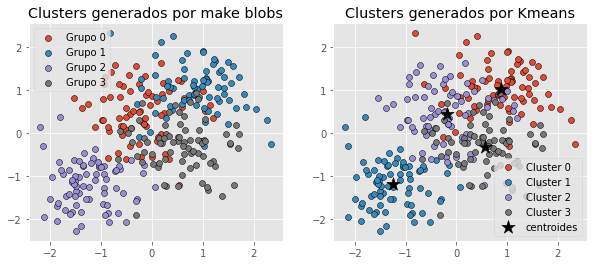

In [52]:
# Representación gráfica: grupos originales vs clusters creados
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Grupos originales
for i in np.unique(y):
    ax[0].scatter(
        x = X_scaled[y == i, 0],
        y = X_scaled[y == i, 1], 
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black', 
        label= f"Grupo {i}"
    )
    
ax[0].set_title('Clusters generados por make blobs')
ax[0].legend();

for i in np.unique(y_predict):
    ax[1].scatter(
        x = X_scaled[y_predict == i, 0],
        y = X_scaled[y_predict == i, 1], 
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black', 
        label= f"Cluster {i}"
    )
    
ax[1].scatter(
    x = modelo_kmeans.cluster_centers_[:, 0],
    y = modelo_kmeans.cluster_centers_[:, 1], 
    c = 'black',
    s = 200,
    marker = '*',
    label  = 'centroides'
)
ax[1].set_title('Clusters generados por Kmeans')
ax[1].legend();

In [59]:
%%timeit -n 10
from sklearn.manifold import TSNE
import seaborn as sns
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(X_scaled)
df = pd.DataFrame()
df["y"] = y_predict
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 300 samples in 0.001s...
[t-SNE] Computed neighbors for 300 samples in 0.014s...
[t-SNE] Computed conditional probabilities for sample 300 / 300
[t-SNE] Mean sigma: 1.018997
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.271446
[t-SNE] KL divergence after 1000 iterations: 0.607548
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 300 samples in 0.000s...
[t-SNE] Computed neighbors for 300 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 300 / 300
[t-SNE] Mean sigma: 1.018997
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.271446
[t-SNE] KL divergence after 1000 iterations: 0.607548
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 300 samples in 0.000s...
[t-SNE] Computed neighbors for 300 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 300 / 300
[t-SNE] Mean sigma: 1.018997
[t-SNE] KL divergence after 250 iteratio

[Text(0.5, 1.0, 'Datos sintéticos T-SNE projection')]

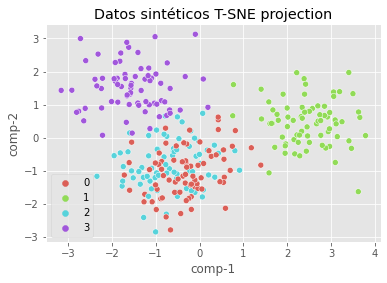

In [60]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 4),
                data=df).set(title="Datos sintéticos T-SNE projection")

Este tipo de visualización es muy útil e informativa, sin embargo, solo es posible cuando se trabaja con dos dimensiones. Si los datos contienen más de dos variables (dimensiones), una posible solución es utilizar las dos primeras componentes principales obtenidas con un PCA (Veremos como hacer PCAs en proximas sesiones)

El número de aciertos y errores puede representarse en modo de matriz de confusión. A la hora de interpretar estas matrices, es importante recordar que el clustering asigna las observaciones a clusters cuyo identificador no tiene porqué coincidir con la nomenclatura empleada para los grupos reales. En este ejemplo, el grupo 1 se ha asignado al cluster 3. Así pues, por cada fila de la matriz cabe esperar un valor alto (coincidencias) para una de las posiciones y valores bajos en las otras (errores de clasificación), pero no tienen por qué coincidir los nombres (diagonal).

In [63]:
%%timeit -n 10
from sklearn.decomposition import PCA
import seaborn as sns
pca = PCA(n_components=2, random_state=123)
z = pca.fit_transform(X_scaled)
df = pd.DataFrame()
df["y"] = y_predict
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]


10 loops, best of 5: 2.02 ms per loop


[Text(0.5, 1.0, 'Datos sintéticos PCA projection')]

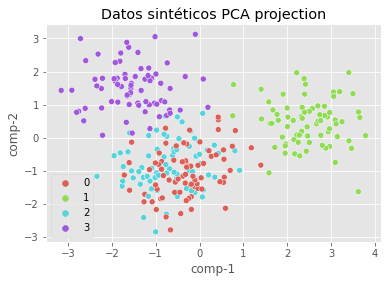

In [64]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 4),
                data=df).set(title="Datos sintéticos PCA projection")